In [1]:
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pd.options.mode.chained_assignment = None  # default='warn'

2023-04-09 13:59:21.520483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# read in data

In [3]:
first_trimester_data = pd.read_csv("first_trimester_data.txt", sep="\t").T
first_trimester_diseases = pd.read_csv("first_trimester_diseases.txt", sep="\t")
first_trimester_data["disease"] = first_trimester_diseases["disease"].values
first_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
2,0,1,0,0,0,0,0,0,0,0,...,0,17,0,0,0,7,132,1,0,Preeclampsia
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47,0,0,Preeclampsia
5,1,1,0,0,6,0,0,0,0,0,...,0,13,2,0,0,2,76,0,0,Preeclampsia
9,1,0,0,0,0,0,0,0,0,0,...,0,47,0,0,0,0,30,0,0,Preeclampsia
20,0,0,0,0,0,0,0,0,0,0,...,0,28,0,0,0,10,111,11,0,Preeclampsia
22,0,2,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,65,0,0,Preeclampsia
25,0,0,0,0,3,0,0,0,0,0,...,0,26,0,0,0,0,160,0,0,Preeclampsia
27,0,0,0,0,0,0,0,0,0,0,...,0,11,0,0,0,0,83,0,0,Preeclampsia
43,0,5,0,0,0,0,0,0,0,1,...,0,24,0,0,0,0,65,0,0,Gestational-Diabetes
44,11,0,0,0,0,0,0,0,0,0,...,0,36,0,0,0,4,95,1,0,Gestational-Diabetes


In [4]:
second_trimester_data = pd.read_csv("second_trimester_data.txt", sep="\t").T
second_trimester_diseases = pd.read_csv("second_trimester_diseases.txt", sep="\t")
second_trimester_data["disease"] = second_trimester_diseases["disease"].values
second_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
0,3,9,0,0,0,0,0,0,0,0,...,0,45,3,0,0,0,135,0,0,Preeclampsia
4,19,0,0,0,0,0,0,0,0,0,...,0,41,0,0,0,0,20,0,0,Preeclampsia
10,0,0,0,0,0,0,0,0,0,0,...,0,35,0,0,0,1,112,7,0,Preeclampsia
13,1,0,0,0,0,0,0,0,0,3,...,0,56,0,0,0,21,171,0,0,Preeclampsia
23,9,0,0,0,0,0,0,0,0,2,...,0,31,0,0,0,1,107,0,0,Preeclampsia
24,0,8,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,98,0,0,Preeclampsia
31,0,0,0,0,3,0,0,0,0,0,...,0,31,0,0,0,13,135,0,0,Preeclampsia
34,1,0,0,0,8,0,0,0,0,0,...,0,38,1,0,0,6,74,2,0,Preeclampsia
42,0,5,0,0,0,0,0,0,0,0,...,0,72,0,0,0,0,110,0,0,Gestational-Diabetes
48,0,0,0,0,2,0,0,0,0,0,...,0,16,0,0,0,10,76,0,0,Gestational-Diabetes


In [5]:
third_trimester_data = pd.read_csv("third_trimester_data.txt", sep="\t").T
third_trimester_diseases = pd.read_csv("third_trimester_diseases.txt", sep="\t")
third_trimester_data["disease"] = third_trimester_diseases["disease"].values
third_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
11,0,0,0,0,0,0,0,3,0,0,...,0,5,0,0,0,3,46,1,0,Preeclampsia
12,0,0,1,0,5,0,0,2,0,2,...,0,35,0,0,1,9,127,0,0,Preeclampsia
14,0,4,0,0,0,0,0,0,0,0,...,0,42,0,0,0,0,213,3,0,Preeclampsia
15,1,0,0,0,2,0,0,0,0,2,...,2,59,0,0,0,11,123,0,0,Preeclampsia
29,0,1,0,0,0,5,1,2,0,0,...,4,83,0,0,4,13,74,10,0,Preeclampsia
33,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,6,175,0,0,Preeclampsia
35,34,2,0,0,0,0,0,0,0,4,...,0,11,0,0,0,1,109,1,0,Preeclampsia
36,0,0,0,0,0,0,0,0,0,2,...,8,47,0,0,0,1,122,0,0,Preeclampsia
40,1,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,3,71,0,0,Gestational-Diabetes
46,2,8,0,0,0,0,0,0,0,0,...,0,29,0,0,0,0,116,0,0,Gestational-Diabetes


# first trimester data prep

In [6]:
first_trimester_data["adverse_pregnancy"] = np.where(first_trimester_data.disease.str.contains("Normal-Pregnancy"), 0, 1)
binary_data_firstT = first_trimester_data.drop(["disease"], axis=1)
binary_data_firstT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,adverse_pregnancy
2,0,1,0,0,0,0,0,0,0,0,...,0,17,0,0,0,7,132,1,0,1
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47,0,0,1
5,1,1,0,0,6,0,0,0,0,0,...,0,13,2,0,0,2,76,0,0,1
9,1,0,0,0,0,0,0,0,0,0,...,0,47,0,0,0,0,30,0,0,1
20,0,0,0,0,0,0,0,0,0,0,...,0,28,0,0,0,10,111,11,0,1
22,0,2,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,65,0,0,1
25,0,0,0,0,3,0,0,0,0,0,...,0,26,0,0,0,0,160,0,0,1
27,0,0,0,0,0,0,0,0,0,0,...,0,11,0,0,0,0,83,0,0,1
43,0,5,0,0,0,0,0,0,0,1,...,0,24,0,0,0,0,65,0,0,1
44,11,0,0,0,0,0,0,0,0,0,...,0,36,0,0,0,4,95,1,0,1


In [7]:
preeclampsia_dif_exp_firstT = pd.read_csv("preeclamspsia_diffe_firstT.txt", sep=" ")
preeclampsia_dif_exp_firstT = preeclampsia_dif_exp_firstT[preeclampsia_dif_exp_firstT["PValue"] <= 0.05]
preeclampsia_dif_exp_firstT = list(preeclampsia_dif_exp_firstT.index)

gestational_diabetes_dif_exp_firstT = pd.read_csv("gestational_diabetes_diffe_firstT.txt", sep=" ")
gestational_diabetes_dif_exp_firstT = gestational_diabetes_dif_exp_firstT[gestational_diabetes_dif_exp_firstT["PValue"] <= 0.05]
gestational_diabetes_dif_exp_firstT = list(gestational_diabetes_dif_exp_firstT.index)

chronic_hypertension_dif_exp_firstT = pd.read_csv("chronic_hypertension_diffe_firstT.txt", sep=" ")
chronic_hypertension_dif_exp_firstT = chronic_hypertension_dif_exp_firstT[chronic_hypertension_dif_exp_firstT["PValue"] <= 0.05]
chronic_hypertension_dif_exp_firstT = list(chronic_hypertension_dif_exp_firstT.index)

firstT_diffe_list = list(set(preeclampsia_dif_exp_firstT + gestational_diabetes_dif_exp_firstT + chronic_hypertension_dif_exp_firstT))
firstT_diffe_list

[40960,
 32771,
 40963,
 49160,
 10,
 57354,
 40971,
 24589,
 15,
 16401,
 40977,
 40979,
 57364,
 16405,
 32790,
 40981,
 8211,
 8219,
 8222,
 32799,
 16417,
 8227,
 36,
 8229,
 38,
 8231,
 40,
 41,
 16421,
 57384,
 32812,
 16429,
 32813,
 41008,
 32817,
 57393,
 16435,
 41013,
 16438,
 32822,
 8253,
 16447,
 8257,
 57410,
 41025,
 57413,
 57414,
 49224,
 16457,
 8265,
 32846,
 41038,
 41039,
 16462,
 32852,
 24669,
 8285,
 95,
 16478,
 24672,
 24675,
 100,
 8297,
 32873,
 108,
 41068,
 57453,
 8303,
 113,
 8305,
 24690,
 32884,
 24693,
 49270,
 16502,
 41077,
 118,
 24699,
 8316,
 8317,
 49277,
 8319,
 128,
 16512,
 41092,
 8326,
 136,
 24717,
 144,
 24720,
 24722,
 49299,
 49300,
 149,
 49302,
 57492,
 41113,
 32924,
 160,
 32929,
 41126,
 8358,
 49321,
 24746,
 32939,
 16556,
 57518,
 175,
 41135,
 41137,
 24754,
 179,
 8371,
 35,
 40742,
 16568,
 57533,
 24766,
 49342,
 193,
 57539,
 49348,
 24773,
 24774,
 57543,
 199,
 49354,
 8396,
 208,
 49361,
 8403,
 8404,
 49364,
 16598,
 1

In [90]:
firstT_diffe = binary_data_firstT[firstT_diffe_list]
firstT_diffe = firstT_diffe.join(binary_data_firstT["adverse_pregnancy"])
firstT_diffe

,40960,32771,40963,49160,10,57354,40971,24589,15,16401,...,57325,49133,57333,49142,8186,8187,40956,16381,8190,adverse_pregnancy
2,1,1,0,0,7,15,0,0,0,13,...,3,0,27,0,61,0,0,0,0,1
3,1,0,0,0,9,3,0,0,0,9,...,0,0,0,0,22,2,0,0,0,1
5,3,0,0,0,2,5,0,7,0,25,...,4,1,20,0,41,1,0,0,0,1
9,0,0,0,0,1,0,0,0,0,5,...,0,0,2,0,25,6,0,0,0,1
20,0,0,0,0,0,0,0,0,0,5,...,0,0,1,0,58,1,0,0,0,1
22,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,20,0,0,0,0,1
25,1,0,0,0,0,9,0,0,0,20,...,0,0,10,0,55,4,0,0,0,1
27,2,0,0,0,0,0,0,0,0,11,...,0,0,19,0,59,0,0,0,0,1
43,2,0,0,0,1,1,0,0,0,18,...,0,0,21,0,72,0,0,0,0,1
44,2,1,0,0,2,6,1,0,0,13,...,3,0,6,0,65,1,0,0,0,1


# first trimester model

## case: pregnancy complications (all diseases) control: healthy pregnancy

In [91]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
## set x and y
X = firstT_diffe.loc[:, firstT_diffe.columns != "adverse_pregnancy"].values
Y = firstT_diffe["adverse_pregnancy"].values 
X.shape

(25, 4611)

In [92]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X = model.transform(X) ## using L-1 based feature selection 
X.shape ## dimentionality of the data is significantly reduced

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(25, 15)

In [93]:
## test/train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [94]:
firstT_model = Sequential()
firstT_model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
firstT_model.add(Dense(8, activation='relu'))
firstT_model.add(Dense(1, activation='sigmoid'))

In [95]:
firstT_model.summary() ## architecture of the model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 128       
                                                                 
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [96]:
firstT_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
history = firstT_model.fit(x_train, y_train, epochs=200,  validation_split=0.25, batch_size=10, verbose=1)
## fitting the model

Epoch 1/200
2/2 [==============================] - 1s 160ms/step - loss: 2047.9963 - accuracy: 0.4615 - val_loss: 9.0085 - val_accuracy: 0.8000
Epoch 2/200
2/2 [==============================] - 0s 26ms/step - loss: 1937.6163 - accuracy: 0.4615 - val_loss: 10.1414 - val_accuracy: 0.6000
Epoch 3/200
2/2 [==============================] - 0s 27ms/step - loss: 1788.9534 - accuracy: 0.4615 - val_loss: 13.1913 - val_accuracy: 0.6000
Epoch 4/200
2/2 [==============================] - 0s 28ms/step - loss: 1679.7815 - accuracy: 0.3077 - val_loss: 15.6525 - val_accuracy: 0.8000
Epoch 5/200
2/2 [==============================] - 0s 26ms/step - loss: 1555.3182 - accuracy: 0.4615 - val_loss: 18.2752 - val_accuracy: 0.8000
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 1428.9922 - accuracy: 0.4615 - val_loss: 20.0358 - val_accuracy: 0.8000
Epoch 7/200
2/2 [==============================] - 0s 27ms/step - loss: 1298.8073 - accuracy: 0.3846 - val_loss: 20.3751 - val_accuracy:

2/2 [==============================] - 0s 27ms/step - loss: 44.1885 - accuracy: 0.8462 - val_loss: 86.7074 - val_accuracy: 0.6000
Epoch 59/200
2/2 [==============================] - 0s 27ms/step - loss: 43.9918 - accuracy: 0.7692 - val_loss: 86.3452 - val_accuracy: 0.6000
Epoch 60/200
2/2 [==============================] - 0s 25ms/step - loss: 43.3343 - accuracy: 0.7692 - val_loss: 86.0723 - val_accuracy: 0.6000
Epoch 61/200
2/2 [==============================] - 0s 25ms/step - loss: 42.6935 - accuracy: 0.7692 - val_loss: 85.7569 - val_accuracy: 0.6000
Epoch 62/200
2/2 [==============================] - 0s 25ms/step - loss: 42.1787 - accuracy: 0.7692 - val_loss: 85.4074 - val_accuracy: 0.6000
Epoch 63/200
2/2 [==============================] - 0s 25ms/step - loss: 41.5122 - accuracy: 0.7692 - val_loss: 85.0780 - val_accuracy: 0.6000
Epoch 64/200
2/2 [==============================] - 0s 25ms/step - loss: 41.0855 - accuracy: 0.7692 - val_loss: 84.6003 - val_accuracy: 0.6000
Epoch 65/200

Epoch 172/200
2/2 [==============================] - 0s 26ms/step - loss: 17.8560 - accuracy: 0.8462 - val_loss: 67.8961 - val_accuracy: 0.4000
Epoch 173/200
2/2 [==============================] - 0s 25ms/step - loss: 13.9067 - accuracy: 0.9231 - val_loss: 68.1397 - val_accuracy: 0.4000
Epoch 174/200
2/2 [==============================] - 0s 27ms/step - loss: 13.9000 - accuracy: 0.9231 - val_loss: 68.2549 - val_accuracy: 0.4000
Epoch 175/200
2/2 [==============================] - 0s 26ms/step - loss: 13.7994 - accuracy: 0.9231 - val_loss: 68.2924 - val_accuracy: 0.4000
Epoch 176/200
2/2 [==============================] - 0s 25ms/step - loss: 13.6664 - accuracy: 0.9231 - val_loss: 68.2402 - val_accuracy: 0.4000
Epoch 177/200
2/2 [==============================] - 0s 26ms/step - loss: 13.3786 - accuracy: 0.9231 - val_loss: 68.1659 - val_accuracy: 0.4000
Epoch 178/200
2/2 [==============================] - 0s 26ms/step - loss: 13.0846 - accuracy: 0.9231 - val_loss: 68.0737 - val_accuracy:

### model evaluation

In [98]:
score = firstT_model.evaluate(x_test, y_test, verbose=0)
score ## accuracy score

[4.034645080566406, 0.7142857313156128]

### plots

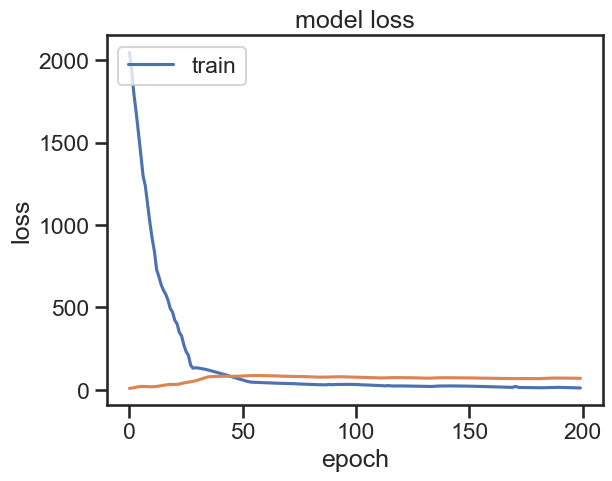

In [99]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show() ## model loss plot

In [40]:
predictions = firstT_model.predict(x_test)
predictions.round(1)
np.rint(predictions)

1/1 [==============================] - 0s 57ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

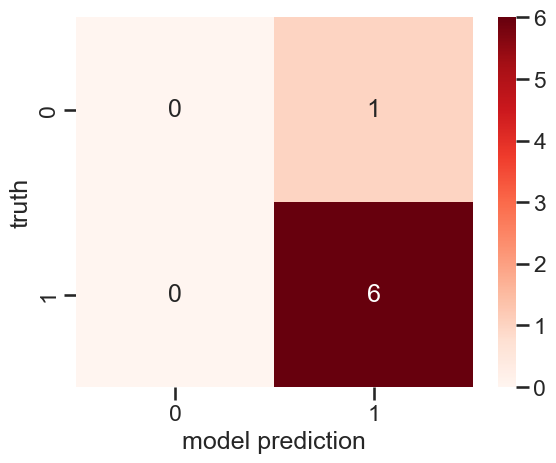

In [42]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() ## confusion matrix to visualize results

# second trimester data prep

In [43]:
second_trimester_data["adverse_pregnancy"] = np.where(second_trimester_data.disease.str.contains("Normal-Pregnancy"), 0, 1)
binary_data_secondT = second_trimester_data.drop(["disease"], axis=1)
binary_data_secondT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,adverse_pregnancy
0,3,9,0,0,0,0,0,0,0,0,...,0,45,3,0,0,0,135,0,0,1
4,19,0,0,0,0,0,0,0,0,0,...,0,41,0,0,0,0,20,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,35,0,0,0,1,112,7,0,1
13,1,0,0,0,0,0,0,0,0,3,...,0,56,0,0,0,21,171,0,0,1
23,9,0,0,0,0,0,0,0,0,2,...,0,31,0,0,0,1,107,0,0,1
24,0,8,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,98,0,0,1
31,0,0,0,0,3,0,0,0,0,0,...,0,31,0,0,0,13,135,0,0,1
34,1,0,0,0,8,0,0,0,0,0,...,0,38,1,0,0,6,74,2,0,1
42,0,5,0,0,0,0,0,0,0,0,...,0,72,0,0,0,0,110,0,0,1
48,0,0,0,0,2,0,0,0,0,0,...,0,16,0,0,0,10,76,0,0,1


In [44]:
preeclampsia_dif_exp_secondT = pd.read_csv("preeclamspsia_diffe_secondT.txt", sep=" ")
preeclampsia_dif_exp_secondT = preeclampsia_dif_exp_secondT[preeclampsia_dif_exp_secondT["PValue"] <= 0.05]
preeclampsia_dif_exp_secondT = list(preeclampsia_dif_exp_secondT.index)

gestational_diabetes_dif_exp_secondT = pd.read_csv("gestational_diabetes_diffe_secondT.txt", sep=" ")
gestational_diabetes_dif_exp_secondT = gestational_diabetes_dif_exp_secondT[gestational_diabetes_dif_exp_secondT["PValue"] <= 0.05]
gestational_diabetes_dif_exp_secondT = list(gestational_diabetes_dif_exp_secondT.index)

chronic_hypertension_dif_exp_secondT = pd.read_csv("chronic_hypertension_diffe_secondT.txt", sep=" ")
chronic_hypertension_dif_exp_secondT = chronic_hypertension_dif_exp_secondT[chronic_hypertension_dif_exp_secondT["PValue"] <= 0.05]
chronic_hypertension_dif_exp_secondT = list(chronic_hypertension_dif_exp_secondT.index)

secondT_diffe_list = list(set(preeclampsia_dif_exp_secondT + gestational_diabetes_dif_exp_secondT + chronic_hypertension_dif_exp_secondT))
secondT_diffe_list

[1,
 8199,
 11,
 24587,
 24588,
 15,
 16403,
 32790,
 16408,
 24610,
 35,
 36,
 37,
 8231,
 57384,
 8234,
 41003,
 49197,
 50,
 32819,
 24626,
 24629,
 57,
 49211,
 8257,
 24642,
 49218,
 57411,
 8261,
 57410,
 8264,
 24649,
 8267,
 32845,
 41038,
 81,
 49235,
 49237,
 88,
 92,
 24679,
 24681,
 57450,
 8302,
 113,
 49271,
 57467,
 124,
 32894,
 41088,
 8323,
 132,
 16519,
 49288,
 24714,
 24722,
 16532,
 151,
 49303,
 49305,
 57504,
 41127,
 57517,
 185,
 186,
 8378,
 16582,
 8391,
 24793,
 41180,
 16607,
 32998,
 8427,
 236,
 57582,
 49391,
 240,
 16627,
 49396,
 57591,
 251,
 49407,
 41215,
 49413,
 49416,
 24851,
 49428,
 57624,
 57625,
 41243,
 33052,
 57633,
 289,
 24869,
 57642,
 307,
 57657,
 8505,
 8509,
 41278,
 324,
 33092,
 41289,
 57675,
 57678,
 57680,
 338,
 33108,
 33109,
 24917,
 24920,
 24921,
 49502,
 33119,
 16738,
 358,
 41319,
 41318,
 33148,
 41341,
 383,
 385,
 57729,
 41349,
 16774,
 391,
 394,
 49547,
 41355,
 49550,
 49569,
 49571,
 41381,
 41401,
 41402,
 332

In [45]:
secondT_diffe = binary_data_secondT[secondT_diffe_list]
secondT_diffe = secondT_diffe.join(binary_data_secondT["adverse_pregnancy"])
secondT_diffe

,1,8199,11,24587,24588,15,16403,32790,16408,24610,...,8165,40933,49127,40936,49129,24553,57328,49138,32758,adverse_pregnancy
0,9,0,0,29,718,0,0,0,18,2,...,0,0,0,0,0,0,3,0,12,1
4,0,0,0,0,578,0,0,0,1,11,...,0,0,0,0,0,0,1,0,0,1
10,0,0,0,9,743,0,0,0,26,21,...,0,0,0,0,0,0,2,0,36,1
13,0,0,0,18,501,0,0,0,11,24,...,0,0,0,0,0,0,16,0,27,1
23,0,0,0,1,399,0,0,0,1,4,...,0,0,0,0,0,0,0,0,34,1
24,8,0,0,67,288,0,0,0,0,55,...,0,0,0,0,0,0,5,0,4,1
31,0,0,0,16,765,0,0,0,12,11,...,0,0,0,0,0,0,2,0,31,1
34,0,4,0,15,182,0,0,0,21,8,...,0,1,0,2,0,0,8,0,5,1
42,5,1,0,7,902,0,0,0,2,34,...,0,0,0,0,0,0,2,0,31,1
48,0,0,0,11,230,0,0,0,0,4,...,0,0,0,0,0,0,2,0,9,1


# second trimester model

## case: pregnancy complications (all diseases) control: healthy pregnancy

In [46]:
## case: pregnancy complications (all diseases) control: healthy pregnancyfrom sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X = secondT_diffe.loc[:, secondT_diffe.columns != "adverse_pregnancy"].values
Y = secondT_diffe["adverse_pregnancy"].values 
X.shape

(26, 2200)

In [47]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X = model.transform(X)
X.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(26, 29)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [50]:
secondT_model = Sequential()
secondT_model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
secondT_model.add(Dense(8, activation='relu'))
secondT_model.add(Dense(1, activation='sigmoid'))

In [52]:
secondT_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 240       
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [53]:
secondT_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
history = secondT_model.fit(x_train, y_train, epochs=300,  validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/300
2/2 [==============================] - 1s 162ms/step - loss: 1480.1099 - accuracy: 0.4667 - val_loss: 1404.6547 - val_accuracy: 0.2500
Epoch 2/300
2/2 [==============================] - 0s 25ms/step - loss: 1429.6603 - accuracy: 0.4667 - val_loss: 1337.7144 - val_accuracy: 0.2500
Epoch 3/300
2/2 [==============================] - 0s 26ms/step - loss: 1365.5687 - accuracy: 0.4667 - val_loss: 1273.4368 - val_accuracy: 0.2500
Epoch 4/300
2/2 [==============================] - 0s 27ms/step - loss: 1315.6337 - accuracy: 0.4667 - val_loss: 1208.6874 - val_accuracy: 0.2500
Epoch 5/300
2/2 [==============================] - 0s 27ms/step - loss: 1259.7605 - accuracy: 0.4667 - val_loss: 1124.5540 - val_accuracy: 0.2500
Epoch 6/300
2/2 [==============================] - 0s 27ms/step - loss: 1198.0632 - accuracy: 0.4667 - val_loss: 1036.8044 - val_accuracy: 0.2500
Epoch 7/300
2/2 [==============================] - 0s 27ms/step - loss: 1153.3207 - accuracy: 0.4667 - val_loss: 950.1821 -

2/2 [==============================] - 0s 25ms/step - loss: 192.4382 - accuracy: 0.5333 - val_loss: 5.6696e-16 - val_accuracy: 1.0000
Epoch 58/300
2/2 [==============================] - 0s 25ms/step - loss: 190.2392 - accuracy: 0.6000 - val_loss: 9.4875e-12 - val_accuracy: 1.0000
Epoch 59/300
2/2 [==============================] - 0s 24ms/step - loss: 188.3716 - accuracy: 0.6000 - val_loss: 4.5005e-11 - val_accuracy: 1.0000
Epoch 60/300
2/2 [==============================] - 0s 24ms/step - loss: 182.7840 - accuracy: 0.6000 - val_loss: 4.7849e-13 - val_accuracy: 1.0000
Epoch 61/300
2/2 [==============================] - 0s 25ms/step - loss: 176.0947 - accuracy: 0.6000 - val_loss: 9.3388e-16 - val_accuracy: 1.0000
Epoch 62/300
2/2 [==============================] - 0s 25ms/step - loss: 166.6795 - accuracy: 0.6000 - val_loss: 1.4804e-12 - val_accuracy: 1.0000
Epoch 63/300
2/2 [==============================] - 0s 25ms/step - loss: 162.6640 - accuracy: 0.6000 - val_loss: 1.1473e-06 - val_a

2/2 [==============================] - 0s 25ms/step - loss: 12.3040 - accuracy: 0.6667 - val_loss: 10.5878 - val_accuracy: 0.7500
Epoch 115/300
2/2 [==============================] - 0s 25ms/step - loss: 12.1803 - accuracy: 0.6667 - val_loss: 10.4978 - val_accuracy: 0.7500
Epoch 116/300
2/2 [==============================] - 0s 26ms/step - loss: 11.8176 - accuracy: 0.6667 - val_loss: 9.9916 - val_accuracy: 0.7500
Epoch 117/300
2/2 [==============================] - 0s 25ms/step - loss: 10.9089 - accuracy: 0.7333 - val_loss: 9.9592 - val_accuracy: 0.7500
Epoch 118/300
2/2 [==============================] - 0s 24ms/step - loss: 10.7268 - accuracy: 0.7333 - val_loss: 10.0373 - val_accuracy: 0.7500
Epoch 119/300
2/2 [==============================] - 0s 24ms/step - loss: 10.4304 - accuracy: 0.7333 - val_loss: 10.2907 - val_accuracy: 0.7500
Epoch 120/300
2/2 [==============================] - 0s 26ms/step - loss: 10.1889 - accuracy: 0.7333 - val_loss: 10.6224 - val_accuracy: 0.7500
Epoch 12

Epoch 229/300
2/2 [==============================] - 0s 25ms/step - loss: 1.4512 - accuracy: 0.8000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 230/300
2/2 [==============================] - 0s 25ms/step - loss: 1.3521 - accuracy: 0.8000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 231/300
2/2 [==============================] - 0s 26ms/step - loss: 1.3053 - accuracy: 0.9333 - val_loss: 0.0818 - val_accuracy: 1.0000
Epoch 232/300
2/2 [==============================] - 0s 25ms/step - loss: 1.3746 - accuracy: 0.9333 - val_loss: 0.2000 - val_accuracy: 0.7500
Epoch 233/300
2/2 [==============================] - 0s 25ms/step - loss: 1.4177 - accuracy: 0.9333 - val_loss: 0.2665 - val_accuracy: 0.7500
Epoch 234/300
2/2 [==============================] - 0s 25ms/step - loss: 1.4342 - accuracy: 0.9333 - val_loss: 0.2403 - val_accuracy: 0.7500
Epoch 235/300
2/2 [==============================] - 0s 26ms/step - loss: 1.4137 - accuracy: 0.9333 - val_loss: 0.1074 - val_accuracy: 1.0000
Epoch 

### model evaluation

In [55]:
score = secondT_model.evaluate(x_test, y_test, verbose=0)
score

[24.408876419067383, 0.7142857313156128]

### plots

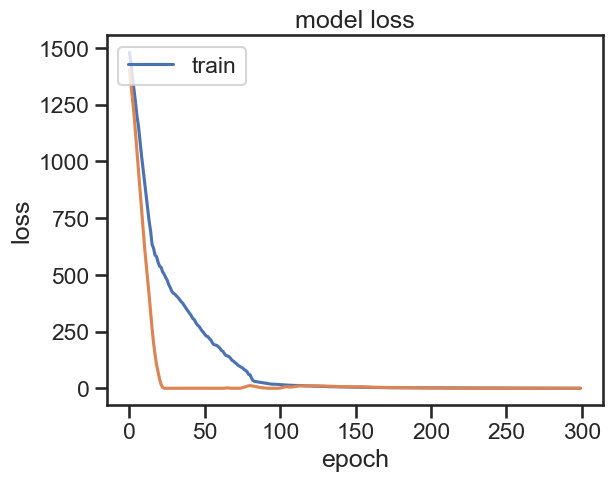

In [56]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

1/1 [==============================] - 0s 58ms/step


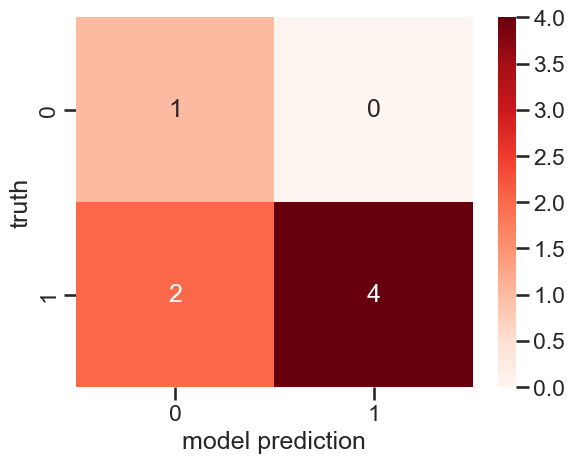

In [57]:
predictions = secondT_model.predict(x_test)
predictions.round(1)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

# third trimester data prep

In [58]:
third_trimester_data["adverse_pregnancy"] = np.where(third_trimester_data.disease.str.contains("Normal-Pregnancy"), 0, 1)
binary_data_thirdT = third_trimester_data.drop(["disease"], axis=1)
binary_data_thirdT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,adverse_pregnancy
11,0,0,0,0,0,0,0,3,0,0,...,0,5,0,0,0,3,46,1,0,1
12,0,0,1,0,5,0,0,2,0,2,...,0,35,0,0,1,9,127,0,0,1
14,0,4,0,0,0,0,0,0,0,0,...,0,42,0,0,0,0,213,3,0,1
15,1,0,0,0,2,0,0,0,0,2,...,2,59,0,0,0,11,123,0,0,1
29,0,1,0,0,0,5,1,2,0,0,...,4,83,0,0,4,13,74,10,0,1
33,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,6,175,0,0,1
35,34,2,0,0,0,0,0,0,0,4,...,0,11,0,0,0,1,109,1,0,1
36,0,0,0,0,0,0,0,0,0,2,...,8,47,0,0,0,1,122,0,0,1
40,1,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,3,71,0,0,1
46,2,8,0,0,0,0,0,0,0,0,...,0,29,0,0,0,0,116,0,0,1


In [59]:
preeclampsia_dif_exp_thirdT = pd.read_csv("preeclamspsia_diffe_thirdT.txt", sep=" ")
preeclampsia_dif_exp_thirdT = preeclampsia_dif_exp_thirdT[preeclampsia_dif_exp_thirdT["PValue"] <= 0.05]
preeclampsia_dif_exp_thirdT = list(preeclampsia_dif_exp_thirdT.index)

gestational_diabetes_dif_exp_thirdT = pd.read_csv("gestational_diabetes_diffe_thirdT.txt", sep=" ")
gestational_diabetes_dif_exp_thirdT = gestational_diabetes_dif_exp_thirdT[gestational_diabetes_dif_exp_thirdT["PValue"] <= 0.05]
gestational_diabetes_dif_exp_thirdT = list(gestational_diabetes_dif_exp_thirdT.index)

chronic_hypertension_dif_exp_thirdT = pd.read_csv("chronic_hypertension_diffe_thirdT.txt", sep=" ")
chronic_hypertension_dif_exp_thirdT = chronic_hypertension_dif_exp_thirdT[chronic_hypertension_dif_exp_thirdT["PValue"] <= 0.05]
chronic_hypertension_dif_exp_thirdT = list(chronic_hypertension_dif_exp_thirdT.index)

thirdT_diffe_list = list(set(preeclampsia_dif_exp_thirdT + gestational_diabetes_dif_exp_thirdT + chronic_hypertension_dif_exp_thirdT))
thirdT_diffe_list

[32772,
 32788,
 20,
 32790,
 32792,
 32795,
 32796,
 32801,
 35,
 36,
 37,
 32817,
 32820,
 55,
 56,
 32824,
 58,
 32826,
 65,
 69,
 71,
 87,
 32855,
 89,
 94,
 32863,
 96,
 97,
 99,
 32869,
 32870,
 103,
 104,
 109,
 32886,
 127,
 32896,
 32897,
 32899,
 132,
 32903,
 137,
 140,
 32909,
 145,
 32921,
 158,
 160,
 32929,
 32930,
 173,
 174,
 175,
 32944,
 177,
 32947,
 182,
 32951,
 184,
 188,
 191,
 32959,
 32962,
 32964,
 198,
 32968,
 32977,
 220,
 32991,
 234,
 240,
 33008,
 245,
 247,
 33018,
 33020,
 33021,
 33024,
 33026,
 272,
 33042,
 276,
 277,
 279,
 33055,
 33058,
 302,
 304,
 306,
 307,
 312,
 33085,
 33088,
 324,
 325,
 33099,
 335,
 33115,
 348,
 33119,
 355,
 356,
 362,
 33130,
 33136,
 378,
 379,
 33147,
 383,
 33156,
 33157,
 33159,
 393,
 33162,
 396,
 33166,
 33168,
 407,
 33177,
 33191,
 33205,
 444,
 33226,
 33228,
 470,
 33247,
 479,
 481,
 485,
 33273,
 508,
 33277,
 512,
 33281,
 33283,
 515,
 33291,
 528,
 535,
 33306,
 33308,
 33309,
 33314,
 548,
 553,
 556

In [60]:
thirdT_diffe = binary_data_thirdT[thirdT_diffe_list]
thirdT_diffe = thirdT_diffe.join(binary_data_thirdT["adverse_pregnancy"])
thirdT_diffe

,32772,32788,20,32790,32792,32795,32796,32801,35,36,...,32701,32702,32704,32708,32722,32725,32740,32741,32743,adverse_pregnancy
11,0,9,0,0,0,1,0,2,22,21,...,8,0,111,3,0,0,0,9,0,1
12,3,15,0,0,12,4,7,2,146,172,...,59,0,336,1,0,0,4,11,0,1
14,0,0,0,0,0,0,0,0,12,23,...,41,0,433,0,0,3,0,20,0,1
15,2,18,0,0,8,4,4,0,93,91,...,83,0,354,4,0,4,3,28,2,1
29,1,42,0,3,1,4,24,11,28,34,...,56,3,134,0,0,2,29,32,6,1
33,0,5,0,0,0,0,0,0,213,3504,...,53,0,611,1,0,16,0,47,0,1
35,0,1,0,0,0,0,0,0,128,245,...,61,0,479,2,0,4,0,24,0,1
36,0,0,0,0,0,0,0,0,77,1133,...,32,0,533,0,0,3,0,26,0,1
40,0,0,0,0,1,0,0,0,11,21,...,96,0,214,0,0,1,0,10,0,1
46,0,0,0,0,0,0,0,0,176,398,...,129,0,521,0,0,22,0,19,0,1


# third trimester model

## case: pregnancy complications (all diseases) control: healthy pregnancy

In [61]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X = thirdT_diffe.loc[:, thirdT_diffe.columns != "adverse_pregnancy"].values
Y = thirdT_diffe["adverse_pregnancy"].values 
X.shape

(25, 7360)

In [62]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X = model.transform(X)
X.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(25, 21)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [64]:
thirdT_model = Sequential()
thirdT_model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
thirdT_model.add(Dense(8, activation='relu'))
thirdT_model.add(Dense(1, activation='sigmoid'))

In [65]:
thirdT_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 176       
                                                                 
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [66]:
thirdT_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history = thirdT_model.fit(x_train, y_train, epochs=200,  validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/200
2/2 [==============================] - 1s 169ms/step - loss: 598.8491 - accuracy: 0.5000 - val_loss: 600.0736 - val_accuracy: 0.2500
Epoch 2/200
2/2 [==============================] - 0s 27ms/step - loss: 520.7585 - accuracy: 0.5000 - val_loss: 570.3906 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 28ms/step - loss: 478.7435 - accuracy: 0.5714 - val_loss: 551.5676 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 432.0530 - accuracy: 0.5714 - val_loss: 534.3549 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 28ms/step - loss: 390.9300 - accuracy: 0.6429 - val_loss: 514.2747 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 28ms/step - loss: 353.7612 - accuracy: 0.6429 - val_loss: 490.7762 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 312.6929 - accuracy: 0.6429 - val_loss: 467

2/2 [==============================] - 0s 25ms/step - loss: 23.4033 - accuracy: 0.8571 - val_loss: 210.3795 - val_accuracy: 0.0000e+00
Epoch 112/200
2/2 [==============================] - 0s 25ms/step - loss: 22.7447 - accuracy: 0.8571 - val_loss: 211.6492 - val_accuracy: 0.0000e+00
Epoch 113/200
2/2 [==============================] - 0s 26ms/step - loss: 22.5928 - accuracy: 0.7857 - val_loss: 210.0734 - val_accuracy: 0.0000e+00
Epoch 114/200
2/2 [==============================] - 0s 29ms/step - loss: 21.7527 - accuracy: 0.8571 - val_loss: 209.0170 - val_accuracy: 0.0000e+00
Epoch 115/200
2/2 [==============================] - 0s 27ms/step - loss: 21.3297 - accuracy: 0.8571 - val_loss: 208.5430 - val_accuracy: 0.0000e+00
Epoch 116/200
2/2 [==============================] - 0s 26ms/step - loss: 21.0049 - accuracy: 0.8571 - val_loss: 208.4986 - val_accuracy: 0.0000e+00
Epoch 117/200
2/2 [==============================] - 0s 25ms/step - loss: 20.4487 - accuracy: 0.8571 - val_loss: 208.641

### model evaluation

In [68]:
score = thirdT_model.evaluate(x_test, y_test, verbose=0)
score

[140.82736206054688, 0.7142857313156128]

### plots

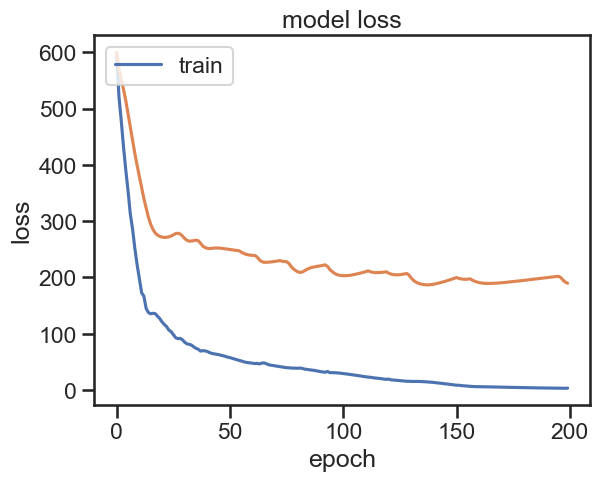

In [69]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

1/1 [==============================] - 0s 58ms/step


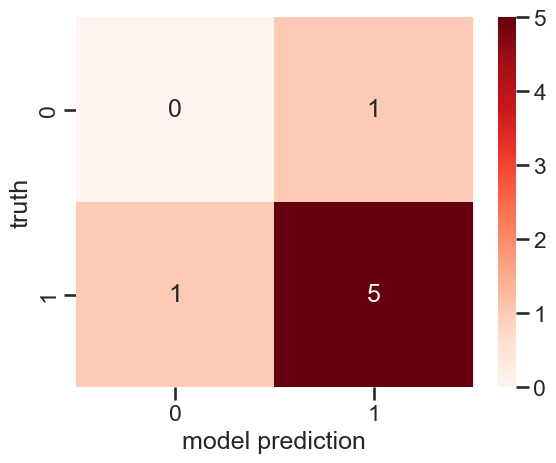

In [70]:
predictions = thirdT_model.predict(x_test)
predictions.round(1)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## barplot of accuracy scores

In [102]:
data = {'accuracy score': [0.8571428656578064, 0.7142857313156128, 0.7142857313156128],
           'trimester': ['t1', 't2', 't3']}

data = pd.DataFrame(data)
data

,accuracy score,trimester
0,0.857143,t1
1,0.714286,t2
2,0.714286,t3


<AxesSubplot:xlabel='trimester', ylabel='accuracy score'>

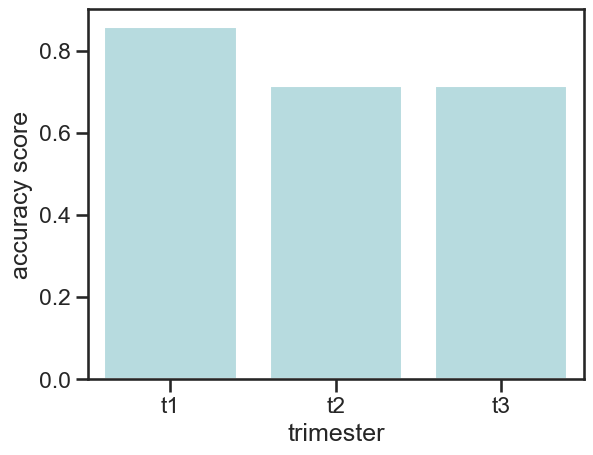

In [107]:
sns.barplot(data = data, x = 'trimester', y = 'accuracy score', color = 'powderblue', ci = None,)

## how do model accuracy scores compare using data from each trimester?